In [471]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [472]:
# Read CSV file with semicolon as the delimiter
df = pd.read_csv('data.csv', delimiter=';')

# Display the DataFrame
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Preparation

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [474]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [475]:
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [476]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [477]:
# Select features for scaling
features_for_scaling = df.drop('Target', axis=1)

# Scale all relevant features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_scaling)

# Replace the original columns with scaled values
df[features_for_scaling.columns] = scaled_features

In [478]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [479]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [480]:
# Display sorted correlation values
sorted_correlations = df.corr()['Target'].sort_values()
print(sorted_correlations)

Age                                              -0.243438
Debtor                                           -0.240999
Gender                                           -0.229270
Application mode                                 -0.221747
Curricular units 2nd sem (without evaluations)   -0.094028
Marital status                                   -0.089804
Curricular units 1st sem (without evaluations)   -0.068702
Previous qualification                           -0.056039
Mother's qualification                           -0.043178
Inflation rate                                   -0.026874
Nationality                                      -0.014801
Educational special needs                        -0.007353
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Father's qualification                           -0.001393
International                                     0.003934
Unemployment rate                                 0.0086

In [481]:
#Remove columns with correlation coefficient less than 0.1
# Set a lower threshold for correlation
lower_correlation_threshold = 0.01

# Identify columns with correlation below the lower threshold
low_corr_columns_lower_threshold = df.columns[df.corr()['Target'].abs() < lower_correlation_threshold]

# Drop the identified columns
df = df.drop(low_corr_columns_lower_threshold, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   float64
 1   Application mode                                4424 non-null   float64
 2   Application order                               4424 non-null   float64
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance	                     4424 non-null   float64
 5   Previous qualification                          4424 non-null   float64
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   float64
 8   Mother's qualification                          4424 non-null   float64
 9   Admission grade                          

# Exploratory Data Analysis

In [482]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [483]:
fig = px.pie(df['Target'].value_counts().reset_index(), names='index', values='Target',
             title='Distribution of Target Variable')
fig.update_traces(labels=['Graduate', 'Dropout', 'Enrolled'], hole=0.4, textinfo='value+label', pull=[0, 0.2, 0.1])
fig.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



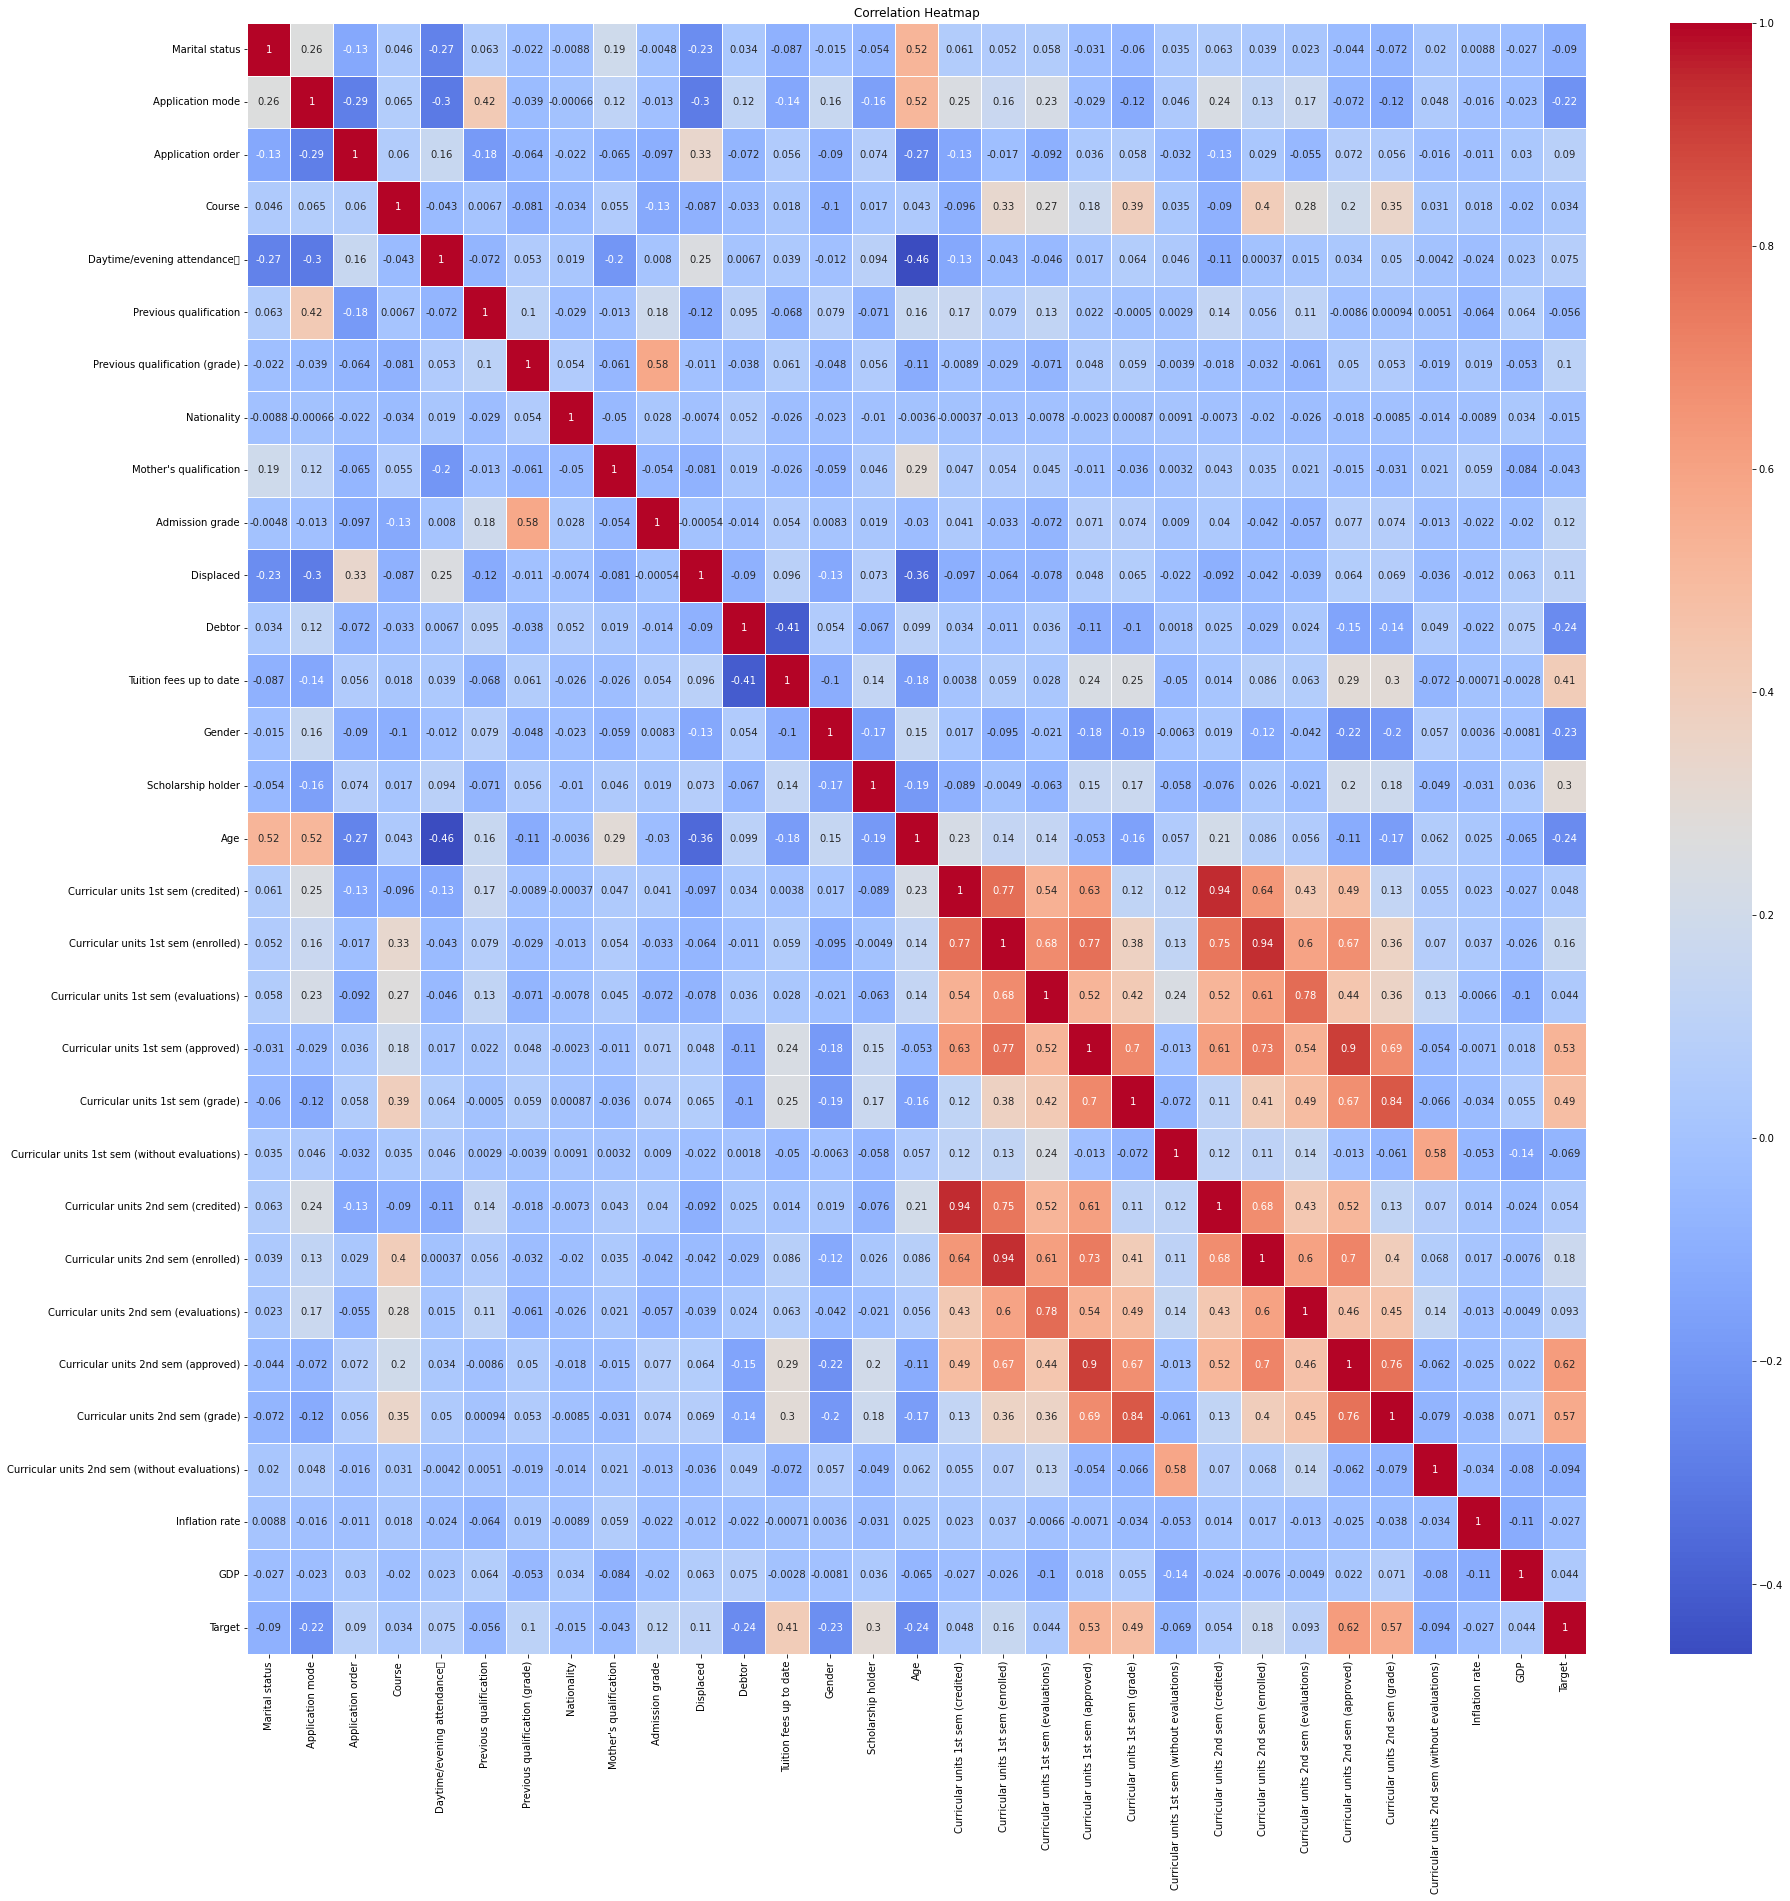

In [484]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

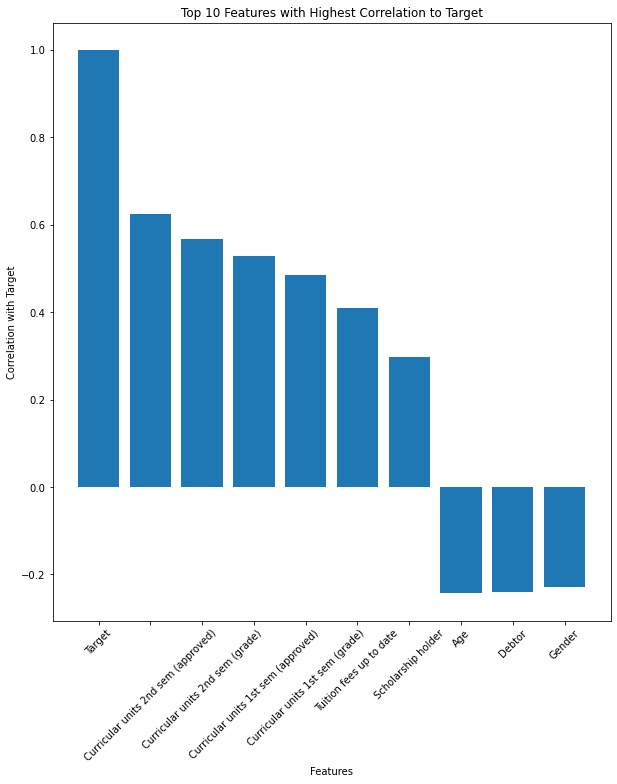

In [485]:
correlations = df.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

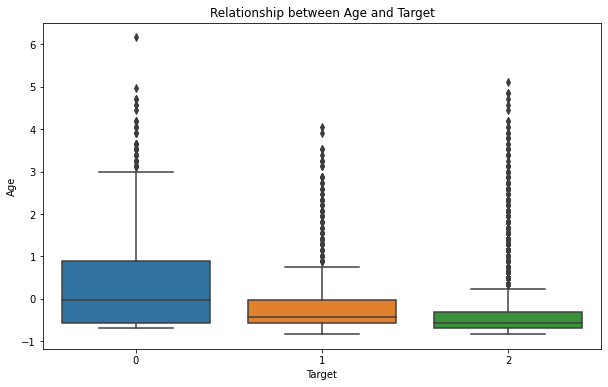

In [486]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

# Clustering

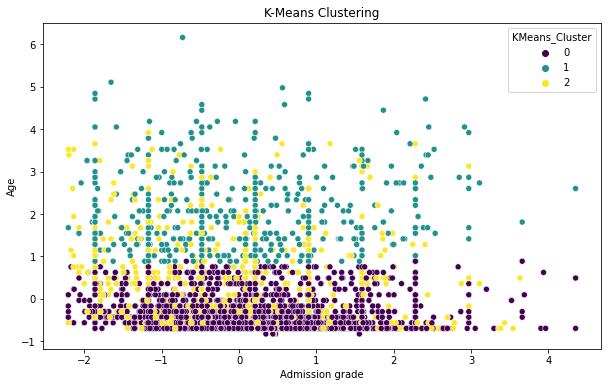

In [487]:
# Clustering using K-Means
features_for_clustering = df[['Admission grade', 'Age', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(features_for_clustering_scaled)


# Visualize K-Means clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Admission grade', y='Age', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

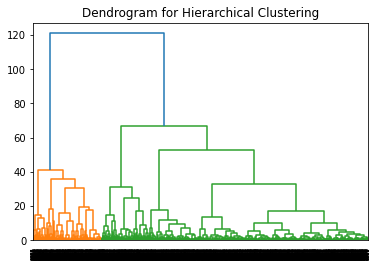

In [488]:
# Hierarchical Clustering
linkage_matrix = linkage(features_for_clustering, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

hierarchical_clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
df['Hierarchical_Cluster'] = hierarchical_clusters

# Prediction Model

In [489]:
X = df.drop(['Target', 'KMeans_Cluster', 'Hierarchical_Cluster'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [490]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

In [491]:
for name, classifier in classifiers + [('Voting Classifier', voting_classifier)]:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f'{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


Decision Tree - Accuracy: 0.6881, F1 Score: 0.6898, Precision: 0.6925, Recall: 0.6881
Random Forest - Accuracy: 0.7661, F1 Score: 0.7471, Precision: 0.7481, Recall: 0.7661
Logistic Regression - Accuracy: 0.7559, F1 Score: 0.7406, Precision: 0.7399, Recall: 0.7559
K-Nearest Neighbors - Accuracy: 0.7096, F1 Score: 0.6980, Precision: 0.6972, Recall: 0.7096
AdaBoost - Accuracy: 0.7435, F1 Score: 0.7292, Precision: 0.7249, Recall: 0.7435
Voting Classifier - Accuracy: 0.7503, F1 Score: 0.7387, Precision: 0.7402, Recall: 0.7503


# Random Forest achieved the highest accuracy, outperforming individual models and a Voting Classifier ensemble. 